# Лекция 4. Число обусловленности. QR разложение и линейная задача наименьших квадратов

## На прошлой лекции

- Линейные системы
- Исключение переменных и метод Гаусса
- LU и PLU разложение
- Симметричные и положительно определённые матрицы

## План на сегодня

- Устойчивость решения линейных систем
- Число обусловленности
- QR разложение
- Производная и градиент: напоминание
- Линейная задача наименьших квадратов и способы её решения

## Устойчивость решения линейных систем

- Существует фундаментальная проблема с решением систем линейных уравнений, которая не зависит от используемого алгоритма.

- Она проявляется, когда элементы матрицы представляются как числа с плавающей точкой или имеется некоторый шум в измерениях.

Проиллюстрируем эту проблему на следующем примере:

- матрица $A = [a_{ij}]$ такая что $a_{ij} = \frac{1}{i+j+1}$ называется матрицей Гильберта ([Давид Гильберт](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D0%BB%D1%8C%D0%B1%D0%B5%D1%80%D1%82,_%D0%94%D0%B0%D0%B2%D0%B8%D0%B4), немецкий математик)
- правая часть $f$ - случайный вектор

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

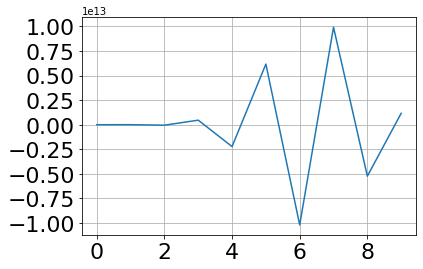

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
print(a)
rhs = np.random.randn(n) #Right-hand side
x = np.linalg.solve(a, rhs) #This function computes LU-factorization and solves linear system

#And check if everything is fine
er = np.linalg.norm(a.dot(x) - rhs) / np.linalg.norm(rhs)
print(er)
plt.plot(x)
plt.grid(True)
plt.xticks(fontsize=22)
_ = plt.yticks(fontsize=22)

## Вопросы

- В чём проблема решения системы из этого примера? 
- Почему ошибка растёт так быстро?  
- В процессе ответа на эти вопросы мы приходим к одному из главных понятий вычислительной линейной алгебры: числу обусловленности матрицы.  

## Число обусловленности линейной системы

Рассмотрим **возмущённую** линейную систему:

$$
   (A + \Delta A) \widehat{x} = f + \Delta f,
$$
где $\Delta A$ некоторая матрица возмущения, и $\Delta f$ возмущение правой части.

- Далее $x$ - решение системы $Ax = f$
- И $\widehat{x}$ - решение возмущённой системы

- **Основной вопрос** - как изменится решение возмущённой системы по сравнению с решением исходной системы?

## Итоговая оценка

$$ 
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A^{-1}\Delta A\|} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \leq \\
\leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A\|\|A^{-1}\|\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \equiv \\
\equiv &\frac{\mathrm{cond}(A)}{1 - \mathrm{cond}(A)\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big)
\end{split}
$$

Главную роль играет **число обусловленности** матрицы $A$: $\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert$.

- **Вопрос**: какое минимально возможное число обусловленности? (Вспомните свойство субмультипликативности норм!)

In [7]:
import numpy as np
n = 3
A = np.random.randint(low=-5, high=5, size=(n, n))
print(A)
print("Condition number for 2-norm")
print(np.linalg.norm(A, 2) * np.linalg.norm(np.linalg.inv(A), 2))
print(np.linalg.cond(A, 2))
print("Condition number for 1-norm")
print(np.linalg.norm(A, 1) * np.linalg.norm(np.linalg.inv(A), 1))
print(np.linalg.cond(A, 1))

[[ 1 -5  0]
 [-3 -2  0]
 [-2 -5 -2]]
Condition number for 2-norm
5.841643129262231
5.841643129262229
Condition number for 1-norm
9.529411764705884
9.529411764705884


## Число обусловленности

- Чем больше число обусловленности, тем меньше цифр в записи числа мы можем правильно восстановить. 
- Число обусловленности разное для разных норм.
- Для спектральной нормы выполнено (проверьте!) $\mathrm{cond}_2 (A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}$
- Заметим, что если $\Delta A = 0$, тогда

$$
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \frac{\|\Delta f\|}{\|f\|}
$$

## И снова матрица Гильберта 

- Проверим насколько оценка точная в двух случаях: единичная правая часть и случайная правая часть
- Результаты существенно отличаются!

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 1000
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print('Error:', er, 'Condition number:', cn)

Error: 2.217472233227586e-06 Condition number: 4.492167979846466e+20


Error: 19.832027222143697 Condition number: 4.073996146476839e+19


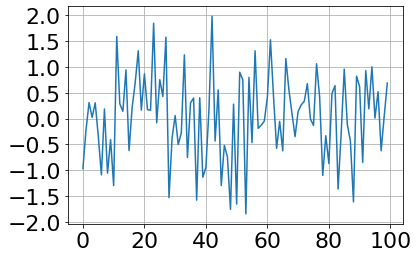

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print('Error:', er, 'Condition number:', cn)

u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)

### Как это объяснить?

## Выводы про устойчивость решения линейных систем

- Число обусловленности - важный показатель устойчивости решения
- Значение числа обусловленности зависит от нормы
- Оценка на ошибку - это верхняя оценка, которая может быть завышена для некоторых правых частей 

## Какие ещё бывают системы линейных уравнений?

- Мы подробно рассмотрели случай квадратной матрицы
- Однако часто встречаются задачи, в которых матрица является **прямоугольной**

## Переопределённые линейные системы

- Рассмотрим переопределённые линейные системы, в которых число уравнений больше, чем число неизвестных.
- Простейший пример: аппроксимация точек на плоскости с помощью линейной модели

Стандартный способ - минимизация невязки (**линейная задача наименьших квадратов**)

$$\Vert A x - b \Vert_2 \rightarrow \min_x$$

## Предварительные замечания

- QR разложение
- Градиент функции

## QR разложение

Как следует из названия, это представление матрицы в виде произведения

$$
    A = Q R, 
$$

где $Q$ – матрица с **ортогональными столбцами** и $R$ – **верхнетреугольная**.  

Размеры матриц: $Q$ – $n \times m$, $R$ – $m \times m$, если $n\geq m$.

QR разложение определено для любой **прямоугольной матрицы**.

In [10]:
import numpy as np

m, n = 5, 3
A = np.random.randint(low=-5, high=5, size=(m, n))
print(A)
Q, R = np.linalg.qr(A)
print(np.linalg.norm(A - Q @ R))
print(R)
print(np.linalg.norm(Q.T @ Q - np.eye(n)))

[[ 0.1  0.   0. ]
 [ 0.  -0.5  0. ]
 [ 0.   0.   0. ]]
[[10  0  0]
 [ 0 -2  0]
 [ 0  0  0]]
0.0
[[10.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  0.]]
0.0


## Применение QR разложения

- Решение переопределённой линейной системы
- Ортогонализация заданного набора векторов
- Используется в алгоритме вычисления SVD

## Существование QR разложения

**Теорема.**

Каждая матрица $n \times m$ может быть представлена в виде QR разложения. 

## Устойчивый метод вычисления на основе отражений Хаусхолдера

Если $A = QR$, тогда  

$$
R = Q^* A,
$$

и нам нужно найти такую ортогональную матрицу $Q$, которая преобразует данную матрицу $A$ в верхнетреугольную.  
Для простоты мы будем смотреть на матрицы $n \times n$ такие что

$$ Q^* A = \begin{bmatrix} * & * & *  \\ 0 & * & * \\ 0 & 0 & * \\ & 0_{(n-m) \times m} \end{bmatrix} $$

Будем приводить матрицу к такому виду столбец за столбцом.

Сначала найдём такую матрицу Хаусхолдера $H_1 = (I - 2 uu^{\top})$ что 

$$ H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \end{bmatrix} $$

Затем

$$ H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \end{bmatrix}, $$

где

$$ H_2 = \begin{bmatrix} 1 & 0 \\ 0 & H'_2, \end{bmatrix} $$

и $H'_2$ матрица Хаусхолдера $3 \times 3$.

И наконец, 

$$ H_3 H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \end{bmatrix}, $$

где $H_3=\begin{bmatrix}I_2 & \\ & {\widetilde H}_3 \end{bmatrix}$ такая что

$$ 
{\widetilde H}_3 \begin{bmatrix} \boldsymbol{\times}\\ \boldsymbol{\times} \\ \boldsymbol{\times}  \end{bmatrix} = 
\begin{bmatrix} \times \\ 0 \\ 0  \end{bmatrix}.
$$

Попробуйте самостоятельно реализовать такой алгоритм!

### Получение QR разложения

Так как 

$$ H_3H_2H_1A = HA = R,$$

где $H$ – ортогональная матрица, то

$$ A = H^*R. $$

Таким образом $Q = H^*$.

## Сложность вычисления QR разложения

- Вычисление QR разложение для прямоугольной матрицы $m \times n$ требует $O(mn^2)$
- Устойчивый способ - через отображения Хаусхолдера, так как он оперирует ортогональными матрицами
- Альтернативный подход на вращениях Гивенса, он больше подходит для разреженных матриц, так как зануляет выбранный элемент за одну итерацию

## Производная и градиент

- Определение производной для функции $f: \mathbb{R} \to \mathbb{R}$ из школы 

$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

- Если функция отображает вектор в число, то роль производной играет **градиент**
- **Определение**: градиент - это вектор-столбец, элементы которого есть частные производные функции по соответствующему элементу входного вектора

$$ f'(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_1} \end{bmatrix} $$

- Частная производная - это производная по элементу вектора при условии, что все остальные элементы постоянные

## Примеры

- $f(x) = x^2\cos(x) \to f'(x) = 2x\cos(x) - x^2 \sin(x)$
- $f(x_1, x_2) = x_1^2\cos(x_2)$
    - $\frac{\partial f}{\partial x_1} = 2x_1 \cos(x_2)$
    - $\frac{\partial f}{\partial x_2} = -x^2_1 \sin(x_2)$
- $f(x) = c^\top x = \sum_{i=1}^n c_i x_i \to \frac{\partial f}{\partial x_k} = c_k \to f'(x) = c$

## Свойства градиента

- Указывает в направлении локального роста функции
- Если точка $x^*$ является локальным минимумом дифференцируемой функции, то $f'(x^*) = 0$
- Более подробно про это будет в части про оптимизацию

## Переопределённая система и матрица Грама

- Мы рассматриваем задачу

$$ \Vert A x - b \Vert_2 \rightarrow \min_x$$ 

- Так как норма - неотрицательная функция, то возведение в квадрат не изменит точку минимума

- Для функции $\Vert A x - b \Vert^2_2$ ноль градиента также является точкой глобального минимума

$$
0 \equiv \nabla \left(\|Ax-b\|_2^2\right) = 2(A^*A x - A^*b) = 0.
$$

Таким образом,

$$
A^* A x = A^* b
$$

Матрица $A^* A$ называется **матрицей Грама**, а система называется **нормальным уравнением**. 

- Число обусловленности матрицы $A^* A$ равно квадрату числа обусловленности матрицы $A$
- Поэтому решать нормальное уравнение в таком виде – не самая хорошая идея!

## Псевдообратная матрица

Матрица $A^* A$ может быть вырождена в общем случае (почему?).
Поэтому необходимо ввести понятие псевдообратной матрицы  $A^{\dagger}$ такой что <br>
решение линейной задачи наименьших квадратов можно было записать в виде

$$x = A^{\dagger} b.$$

Матрица 

$$
A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*
$$ 

называется псевдообратной матрицей Мура-Пенроуза для матрицы $A$.

* Если матрица $A$ имеет полный ранг, тогда $A^* A$ невырождена, и мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*$.

* Если матрица $A$ квадратная и невырожденная, мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$ – обычная обратная матрица для $A$

* Если $A$ имеет линейно зависимые столбцы, тогда $A^\dagger b$ даёт решение минимальной евклидовой нормы. 

## Вычисление псевдообратной матрицы с помощью SVD

Пусть $A = U \Sigma V^*$ SVD для матрицы $A$. Тогда,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*,$$

* Вы можете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел <br>
* Если сингулярные числа малы, их можно не обращать. Это даст решение менее чувствительное к шуму в правой части

**Q:** что произошло с числом обусловленности?

## Стандартный способ решения линейной задачи наименьших квадратов

- Использование $QR$ разложения

- Любая матрица может быть представлена в виде 

$$
A = Q R,
$$

где $Q$ – унитарная матрица, и $R$ – верхнетреугольная.

- Тогда, если $A$ имеет полный ранг, тогда

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$ 

- Таким образом, задача поиска оптимального $x$ эквивалентна решению следующей квадратной системы 

$$
Rx = Q^* b.
$$

- Так как $R$ верхнетреугольная, решение этой системы требует $\mathcal{O}(n^2)$ операций. Также этот способ более устойчив, чем использование псевдообратной матрицы напрямую.

## Пример линейной задачи наименьших квадратов

Рассмотрим двумерный пример. Пусть дана линейная модель 

$$y = ax + b$$

и зашумлённые данные $(x_1, y_1), \dots (x_n, y_n)$. Тогда линейная система на коэффициенты будет выглядеть как 

$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$
или в матричном виде
$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$
что является переопределённой системой

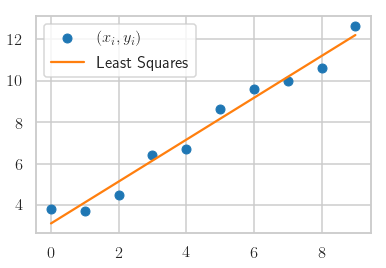

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a_exact = 1.
b_exact = 2.

n = 10
xi = np.arange(n)
yi = a_exact * xi + b_exact + 2*np.random.random(n)

A = np.array([xi, np.ones(n)])
coef = np.linalg.pinv(A).T.dot(yi) # coef is [a, b]

plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least Squares')
plt.legend(loc='best')

## Выводы

- QR разложение: что такое, как посчитать, зачем нужно
- Градиент и его свойства
- Нормальное уравнение
- Псевдообратная матрица